Analyzing saved lyrics dataframes by counting occurences of words of topcis within songs within genres

Then sum the occurences for each artist and for each genre

Then use bar plots to visualize the differences

Only uses genre, artists and lyrics here

In [155]:
import pandas as pd
import re
import os
import plotly
import plotly.express as px

In [156]:
genre = 'pop'

In [157]:
df_path = f'dataframes/cleaned_{genre}_10.csv'

In [158]:
df = pd.read_csv(df_path, index_col=0)

In [159]:
df.sample(5)

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,producer_count,writer_count,Song Lyrics,Artist Image
114,Dua Lipa,Good in Bed,Good in Bed by Dua Lipa,2020-03-27,2020.0,3.0,27.0,216025,https://genius.com/Dua-lipa-good-in-bed-lyrics,0,2,6,hey yeah let's get to the point here you love...,https://images.genius.com/6dd7902577d2e9ac6096...
88,Charli XCX,Click,Click by Charli XCX (Ft. Kim Petras & Tommy Cash),2019-09-13,2019.0,9.0,13.0,95461,https://genius.com/Charli-xcx-click-lyrics,2,3,7,86 contributorsclick lyrics get what i want li...,https://images.genius.com/be4e9b6974830837af31...
73,Carly Rae Jepsen,Beach House,Beach House by Carly Rae Jepsen,2022-08-05,2022.0,8.0,5.0,37892,https://genius.com/Carly-rae-jepsen-beach-hous...,0,1,3,boy number one made a picnic for two saw he wa...,https://images.genius.com/b879fdb5b83b238e945c...
84,Charli XCX,Unlock It,Unlock It by Charli XCX (Ft. Jay Park (박재범) & ...,2017-12-15,2017.0,12.0,15.0,150278,https://genius.com/Charli-xcx-unlock-it-lyrics,2,2,5,70 contributorsunlock it lyrics lock it lock i...,https://images.genius.com/be4e9b6974830837af31...
171,Olivia Rodrigo,​favorite crime,​favorite crime by Olivia Rodrigo,2021-05-21,2021.0,5.0,21.0,1009217,https://genius.com/Olivia-rodrigo-favorite-cri...,0,1,2,know that i loved you so bad i let you treat m...,https://images.genius.com/69fb560dfa6184da4b62...


In [15]:
# to_count = ['money', 'shoot', 'god', 'heart', 'hard', 'nigga', 'fuck', 'party', 'weed', 'devil']
# for i in df.index:
#     lyrics = df['Song Lyrics'].str
#     for word in to_count:
#         word_count = lyrics.count(word)
#         df[word] = word_count
#     # artists_df['you'][i]

### Specify thematic word groups

In [160]:
to_count_groups = [
    {
        'group': 'love',
        'group_words': ['love', 'lover', 'honey', 'baby', 'heart',
                      'sweetheart', 'loverboy', 'babygirl']
    },
    {
        'group': 'money',
        'group_words': ['money', 'cash', 'gold', 'bill', 'check', 'checks',
                     'dolla', 'bag', 'bags']
    },
    {
        'group': 'violence',
        'group_words': ['shoot', 'kill', 'kills', 'victim', 'whack', 'murder',
                      'gun', 'rob', 'robbin', 'steal', 'stole', 'whacked',
                      'killed', 'shot', 'robbed']
    },
    {
        'group': 'drugs',
        'group_words': ['drugs', 'weed', 'kush', 'mary jane',
                      'perc', 'cocaine', 'molly',]
    },
    {
        'group': 'gendered',
        'group_words': ['girl', 'boy', 'man', 'woman', 'him', 'her', 'he', 'she']
    },
    {
        'group': 'sadness',
        'group_words': ['sad', 'sadness', 'hate' ,'hateful', 'sadly', 'melancholy',
                       'sorry', 'bitter', 'heartbreak', 'heartbroken']
    },
    {
        'group': 'joy',
        'group_words': ['joy', 'happy', 'wonder' ,'pride', 'smile', 'joyful',
                       'laugh', 'lucky', 'glad', 'hope', 'hopeful', 'bliss',
                       'euphoria']
    },
    {
        'group': 'yes',
        'group_words': ['yes', 'agree', 'agreed', 'sure', 'confirm', 'accept']
    },
    {
        'group': 'no',
        'group_words': ['no', 'disagree', 'resist', 'reject', 'deny']
    }
]

### Function to Count occurrences

In [207]:
def count_occurrences(df, to_count_groups):
    df['vocab'] = 0
    for i in df.index:
        lyrics = df['Song Lyrics'].str
        lyrics_set = set(df['Song Lyrics'][i].split())
        lyrics_len = len(lyrics_set)
        for group in to_count_groups:
            group_count_total = 0
            for group_word in group['group_words']:
                group_word_count = lyrics.count(group_word)
                group_count_total += group_word_count
            df[group['group']] = group_count_total
        df['vocab'][i] = lyrics_len
    return df

In [203]:
df = count_occurrences(df, to_count_groups)

C:\Users\User\AppData\Local\Temp\ipykernel_22500\3638917261.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_22500\3638917261.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_22500\3638917261.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_22500\3638917261.py:12: SettingWithCopyWarning:


A value

In [204]:
df.columns

Index(['Artist', 'Song Title', 'Full Title', 'Release Date', 'Year', 'Month',
       'Day', 'Pageviews', 'url', 'featured_count', 'producer_count',
       'writer_count', 'Song Lyrics', 'Artist Image', 'love', 'vocab', 'money',
       'violence', 'drugs', 'gendered', 'sadness', 'joy', 'yes', 'no'],
      dtype='object')

In [205]:
df['vocab']

0       84
1       99
2      108
3      112
4      109
      ... 
195     83
196    121
197     71
198    105
199    126
Name: vocab, Length: 200, dtype: int64

### Create a subplot graph for group occurences for genre

In [173]:
import plotly.graph_objects as graph_objects
from plotly.subplots import make_subplots

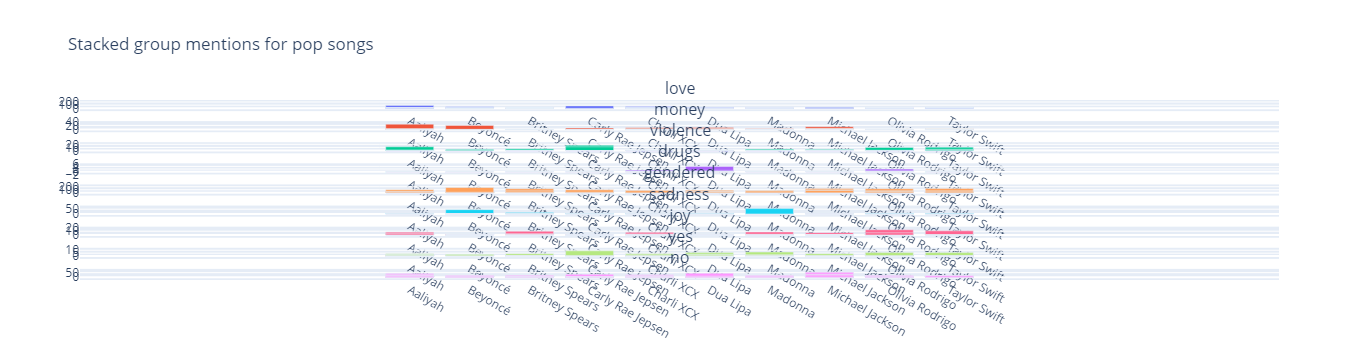

In [176]:
fig_groups = ['love', 'money', 'violence', 'drugs', 'gendered', 'sadness', 'joy', 'yes', 'no']

group_len = len(fig_groups)

pop_group_fig = make_subplots(rows=group_len, cols=1, subplot_titles=fig_groups,
                              # vertical_spacing = 0.25)
                             )

for row, fig_group in enumerate(fig_groups):
    # fig = px.bar(df, x='Artist', y=fig_group, color="Song Title")
    # fig.update_layout(showlegend=False)
    fig = graph_objects.Bar(x=df['Artist'], y=df[fig_group],
                         showlegend=False, base="stack",
                         )
    # fig.update_layout(yaxis_range=[0, 175])
    pop_group_fig.append_trace(
        fig,
        row=row+1, col=1
    )

pop_group_fig.update_layout(height=250*group_len, title_text="Stacked group mentions for pop songs",
                           yaxis=dict(range=[0,175]))
pop_group_fig.show()

### Single group, colored by songs

In [ ]:
# fig = px.bar(df, x='Artist', y='love', color="Song Title")
# fig.update_layout(showlegend=False)
# fig.show()

### Compare genres, create a new df for comparing?

In [57]:
df.sample(5)

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,producer_count,writer_count,Song Lyrics,Artist Image,love,money,violence,drugs,gendered
48,Britney Spears,Make Me...,Make Me... by Britney Spears (Ft. G-Eazy),2016-07-14,2016.0,7.0,14.0,165578,https://genius.com/Britney-spears-make-me-lyrics,1,1,4,83 contributorsmake me lyrics friday i'm dream...,https://images.genius.com/da43b98169ffc7cfff48...,4,0,1,0,36
99,Charli XCX,Out of My Head,Out of My Head by Charli XCX (Ft. ALMA & Tove Lo),2017-12-08,2017.0,12.0,8.0,74316,https://genius.com/Charli-xcx-out-of-my-head-l...,2,2,5,38 contributorsout of my head lyrics ehehxcx ...,https://images.genius.com/be4e9b6974830837af31...,4,0,0,0,67
47,Britney Spears,Gimme More,Gimme More by Britney Spears,2007-08-31,2007.0,8.0,31.0,168894,https://genius.com/Britney-spears-gimme-more-l...,0,1,4,it's britney bitch i see you and i just wanna ...,https://images.genius.com/da43b98169ffc7cfff48...,0,0,0,0,23
178,Olivia Rodrigo,​logical,​logical by Olivia Rodrigo,2023-09-08,2023.0,9.0,8.0,776598,https://genius.com/Olivia-rodrigo-logical-lyrics,0,2,3,master manipulator god you're so good at what ...,https://images.genius.com/69fb560dfa6184da4b62...,11,0,1,0,21
107,Dua Lipa,Physical,Physical by Dua Lipa,2020-01-30,2020.0,1.0,30.0,520815,https://genius.com/Dua-lipa-physical-lyrics,0,4,4,common love isn't for us we created something ...,https://images.genius.com/6dd7902577d2e9ac6096...,7,0,0,0,9


In [100]:
genre_count_df = pd.DataFrame(columns=[*fig_groups, 'featured_count',
                              'producer_count', 'writer_count'])

In [67]:
fig_groups

['love', 'money', 'violence', 'drugs', 'gendered']

In [72]:
df_grouped = df.groupby(['Artist']).sum()

In [89]:
df_cutout = df_grouped[['love', 'money', 'violence', 'drugs', 'gendered', 'featured_count','producer_count', 'writer_count']]

In [90]:
df_cutout = pd.DataFrame(df_cutout.sum())

In [92]:
df_cutout = df_cutout.T

In [96]:
df_cutout.index = ['pop']
df_cutout

,love,money,violence,drugs,gendered,featured_count,producer_count,writer_count
pop,1573,133,159,9,7849,47,369,706


In [101]:
genre_count_df = pd.concat([genre_count_df, df_cutout], axis=0)

In [102]:
genre_count_df

,love,money,violence,drugs,gendered,featured_count,producer_count,writer_count
pop,1573,133,159,9,7849,47,369,706


### Do the above for all genres
plus save intermediate within-genre summaries

In [177]:
genres = ['pop', 'rap', 'rock', 'soul']

In [208]:
# dataframes for genre comparing
genre_sum_df = pd.DataFrame(columns=[*fig_groups, 'featured_count',
                                  'producer_count', 'writer_count'])
genre_mean_df = pd.DataFrame(columns=[*fig_groups, 'featured_count',
                                  'producer_count', 'writer_count'])

to_save_cols = ['love', 'money', 'violence', 'drugs', 'gendered',
                                  'sadness', 'joy', 'yes', 'no', 'vocab',
                                  'featured_count','producer_count', 'writer_count']

for genre in genres:
    df_path = f'dataframes/cleaned_{genre}_10.csv'
    df = pd.read_csv(df_path, index_col=0)

    # count occurences
    # for i in df.index:
    #     lyrics = df['Song Lyrics'].str
    #     for group in to_count_groups:
    #         group_count_total = 0
    #         for group_word in group['group_words']:
    #             group_word_count = lyrics.count(group_word)
    #             group_count_total += group_word_count
    #         df[group['group']] = group_count_total
    df = count_occurrences(df, to_count_groups)

    df.to_csv(f'dataframes/with_counts/{genre}_count.csv')

    # group by artists and select only columns with value to us
    df_summed = df.groupby(['Artist']).sum()
    df_summed_cutout = df_summed[to_save_cols]

    df_mean = df.groupby(['Artist'])[to_save_cols].mean()
    df_mean_cutout = df_mean[to_save_cols]
    
    # save within-genre df summed for each artist
    df_len = len(df_summed)
    df_summed_cutout.to_csv(f'dataframes/group_stats/sum/{genre}_{df_len}.csv')
    df_mean_cutout.to_csv(f'dataframes/group_stats/mean/{genre}_{df_len}.csv')
    
    genre_sum = pd.DataFrame(df_summed_cutout.sum())
    genre_sum = genre_sum.T
    genre_sum.index = [genre]

    genre_mean = pd.DataFrame(df_mean_cutout.mean())
    genre_mean = genre_mean.T
    genre_mean.index = [genre]

    # add to all genres df
    genre_sum_df = pd.concat([genre_sum_df, genre_sum], axis=0)
    genre_mean_df = pd.concat([genre_mean_df, genre_sum], axis=0)

genre_sum_df.to_csv(f'dataframes/group_stats/genre_sum_df.csv')
genre_mean_df.to_csv(f'dataframes/group_stats/genre_mean_df.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_22500\1231381872.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_22500\1231381872.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_22500\1231381872.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_22500\1231381872.py:13: SettingWithCopyWarning:


A value

### Analyze the combined dfs

In [209]:
loaded_sum_df = pd.read_csv('dataframes/group_stats/genre_sum_df.csv', index_col = 0)

In [210]:
loaded_sum_df.head()

,love,money,violence,drugs,gendered,sadness,joy,yes,no,featured_count,producer_count,writer_count,vocab
pop,1573,133,159,9,7849,235,159,155,2146,47,369,706,25329.0
rap,790,634,649,97,15813,196,261,290,3152,119,396,1010,60440.0
rock,447,46,145,18,5073,38,104,109,1353,6,273,530,18626.0
soul,1661,52,33,4,5334,46,294,213,1389,9,271,342,19923.0


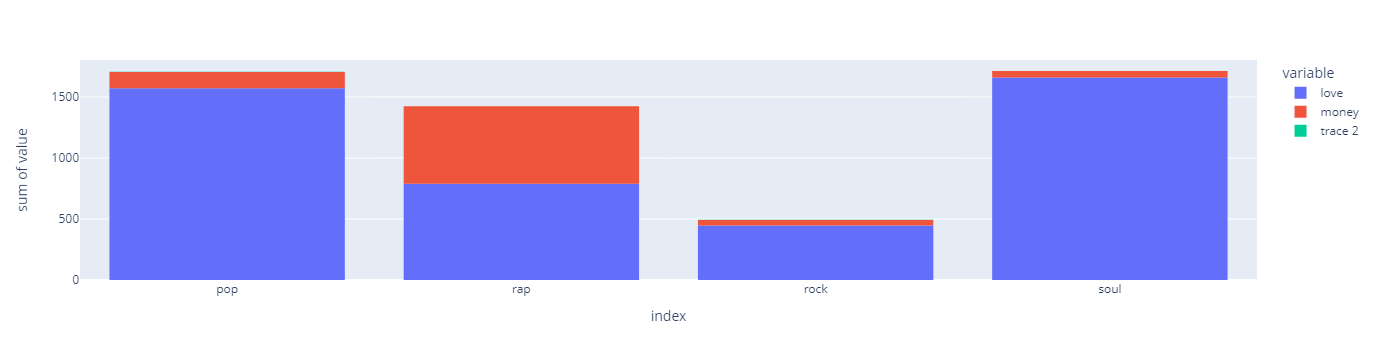

In [133]:
summed_fig = px.histogram(loaded_sum_df, y=['love', 'money'], x=loaded_sum_df.index,
                         # barmode='group')
                         )
money_fig = graph_objects.Histogram(
    x=loaded_sum_df.index,
    y=loaded_sum_df['money'].values
)

summed_fig.add_trace(money_fig)

# fig.update_layout(showlegend=False)
summed_fig.show()

In [129]:
loaded_sum_df['money'].values

array([133, 634,  46,  52], dtype=int64)

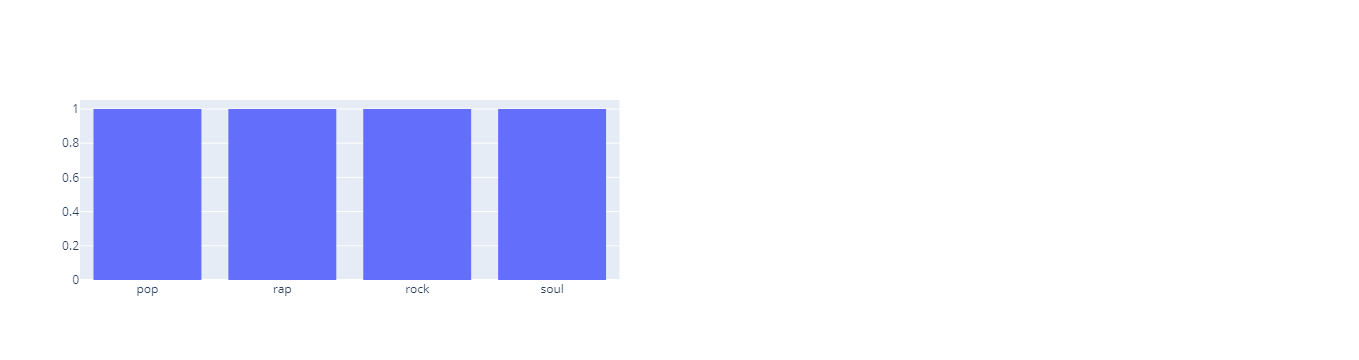

In [132]:
money_fig = graph_objects.Histogram(
    x=loaded_sum_df.index,
    y=loaded_sum_df['money'].values
)
test_fig = make_subplots(rows=1, cols=2)
test_fig.add_trace(money_fig)
test_fig.show()

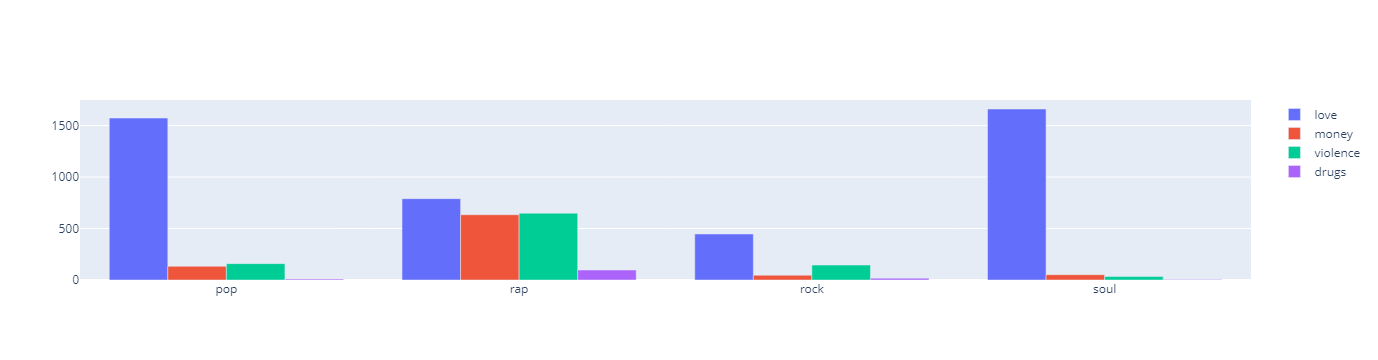

In [137]:
side_fig = graph_objects.Figure()
side_fig.add_trace(graph_objects.Bar(y=loaded_sum_df['love'].values, x=loaded_sum_df.index, name='love'))
side_fig.add_trace(graph_objects.Bar(y=loaded_sum_df['money'].values, x=loaded_sum_df.index, name='money'))
side_fig.add_trace(graph_objects.Bar(y=loaded_sum_df['violence'].values, x=loaded_sum_df.index, name='violence'))
side_fig.add_trace(graph_objects.Bar(y=loaded_sum_df['drugs'].values, x=loaded_sum_df.index, name='drugs'))
side_fig.show()

In [198]:
lyrics = df['Song Lyrics'][1]

In [199]:
len(set(lyrics.split()))

99